In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PowerTransformer

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
data = pd.DataFrame(PowerTransformer().fit_transform(data), columns = data.columns)

In [5]:
import seaborn as sns

In [6]:
corr_feature=data.iloc[:,1:].corr()

In [7]:
print(corr_feature)

          f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
f_00  1.000000 -0.001954  0.002642  0.000101  0.008793  0.003818  0.002898   
f_01 -0.001954  1.000000  0.001391 -0.001693 -0.001727 -0.001445  0.001829   
f_02  0.002642  0.001391  1.000000 -0.003260 -0.000726 -0.003727  0.003738   
f_03  0.000101 -0.001693 -0.003260  1.000000  0.000238  0.009840  0.002576   
f_04  0.008793 -0.001727 -0.000726  0.000238  1.000000  0.004549  0.004146   
f_05  0.003818 -0.001445 -0.003727  0.009840  0.004549  1.000000  0.004821   
f_06  0.002898  0.001829  0.003738  0.002576  0.004146  0.004821  1.000000   
f_07 -0.002984  0.006140  0.001487 -0.000855  0.006280  0.003843 -0.001561   
f_08 -0.000943  0.000491  0.004856 -0.000217 -0.003360 -0.003031 -0.006186   
f_09 -0.000439  0.003331 -0.004290  0.002018  0.003582 -0.001176  0.010740   
f_10  0.002096  0.001757  0.005357 -0.002780 -0.004418  0.002640 -0.004668   
f_11 -0.000591 -0.001399  0.001363  0.003442 -0.000067 -0.000904

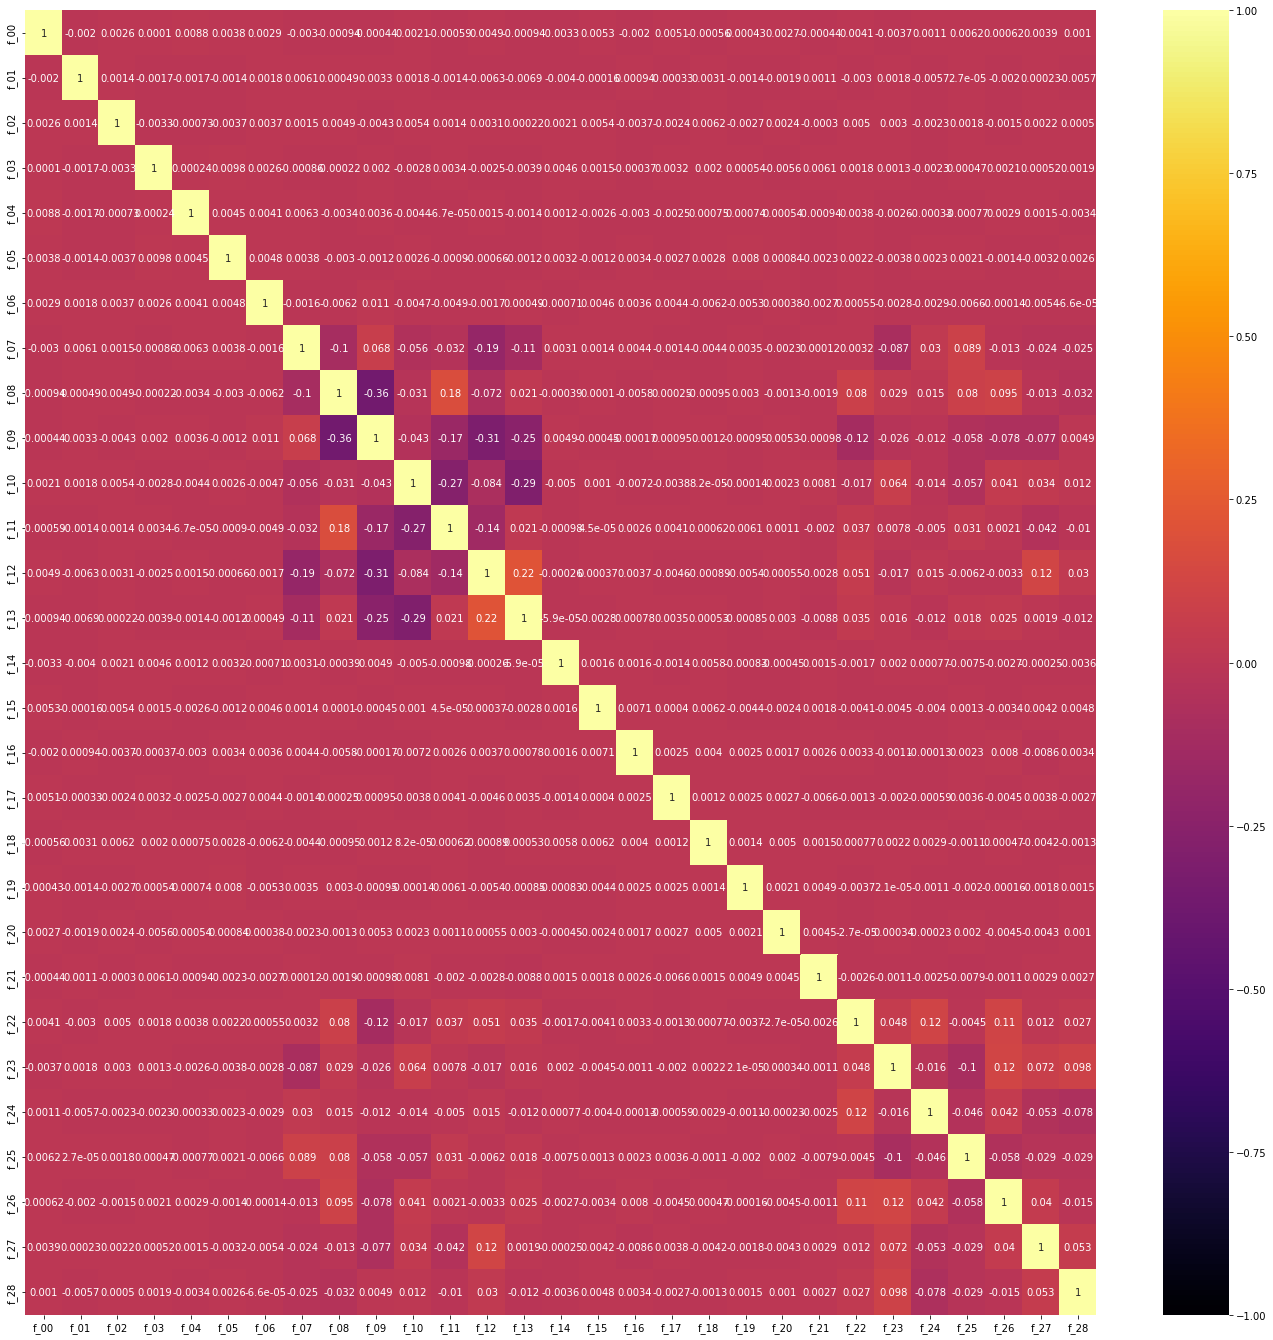

In [8]:
plt.figure(figsize=(24,24))
sns.heatmap(corr_feature,vmax=1,vmin=-1,annot=True,cmap='inferno')
plt.show()

In [9]:
rel_feature=abs(corr_feature.iloc[:,1:])
features=rel_feature[rel_feature>0.05]
features_title=[index for index,value in features.iteritems()]
print(features_title)

['f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


In [10]:
data.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28'],
      dtype='object')

In [11]:
a=[ 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16','f_17', 'f_18', 'f_19', 'f_20', 'f_21']
def dr(a):
  for i in a:
    data.drop(labels=i,axis=1,inplace=True)
dr(a)

In [12]:
data.head()

,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-2.196170,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-2.195469,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,-2.194869,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,-2.194325,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,-2.193820,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


In [13]:
data.columns

Index(['id', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22',
       'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28'],
      dtype='object')

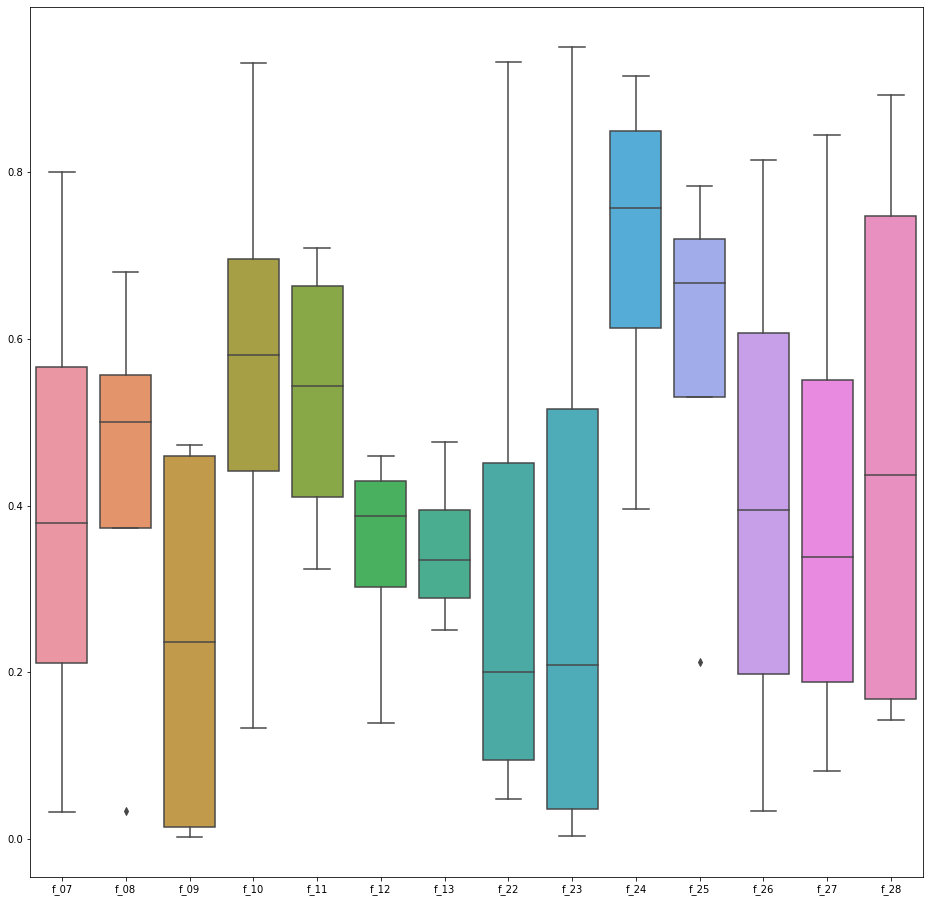

In [14]:
plt.figure(figsize=(16,16))
df = pd.DataFrame(data = np.random.random(size=(4,14)), columns = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22',
       'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28'])
sns.boxplot(data=df)
plt.show()

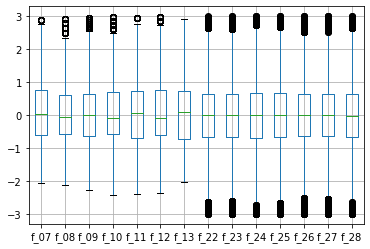

In [15]:
from scipy import stats
no_outliers=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
no_outliers.boxplot(column = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22',
       'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28'])

In [16]:
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from yellowbrick.cluster import KElbowVisualizer

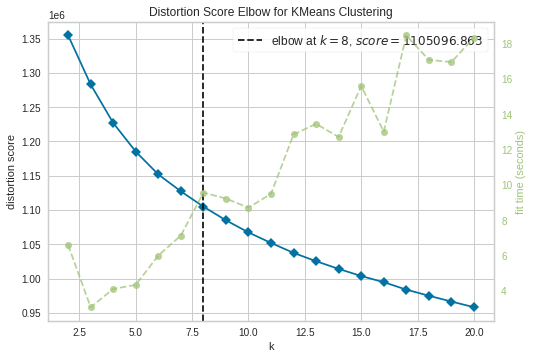

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21), timings= True)
visualizer.fit(data)
visualizer.show()

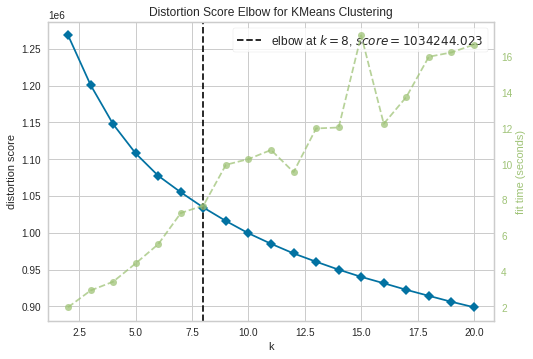

In [18]:
visualizer = KElbowVisualizer(model, k=(2,21), timings= True)
visualizer.fit(no_outliers)
visualizer.show()

In [19]:
model = KMeans(n_clusters = 7)
model.fit(no_outliers)
pred = model.predict(data)

In [20]:
sub=pd.read_csv('sample_submission.csv')
sub['Predicted']=pred
sub.to_csv('sub.csv',index=False)

In [21]:
model = BayesianGaussianMixture(n_components = 7, covariance_type = 'full')
model.fit(no_outliers)
predictions = model.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [22]:
model.fit(data)
pred = model.predict(data)

In [23]:
sub['Predicted'] = pred
sub.to_csv('sub.csv', index = False)